In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [10]:
#pip install datasist

In [11]:
#pip install category_encoders

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
# from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
# import category_encoders as ce
import re 

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2)
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

In [13]:
data1 = pd.read_csv('test.csv')
data2 = pd.read_csv('train.csv')
data = data1+data2

In [14]:
data.shape

(27323, 28)

In [15]:
data.head()

,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Score,Credit_Utilization_Ratio,Customer_ID,Delay_from_due_date,...,Num_Credit_Inquiries,Num_of_Delayed_Payment,Num_of_Loan,Occupation,Outstanding_Debt,Payment_Behaviour,Payment_of_Min_Amount,SSN,Total_EMI_per_month,Type_of_Loan
0,2323,236.6426820327213580.41529543900253,19114.1219114.12,11.2711.27,22 Years and 9 Months22 Years and 1 Months,Good_,NaN,61.853021,CUS_0xd40CUS_0xd40,6.0,...,2026.0,77,44,ScientistScientist,809.98809.98,Low_spent_Small_value_paymentsHigh_spent_Small...,NoNo,821-00-0265821-00-0265,99.149898,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,2423,21.465380264657146118.28022162236736,19114.1219114.12,13.2711.27,NaN,GoodGood,NaN,64.998075,CUS_0xd40CUS_0xd40,2.0,...,8.0,NaN,44,ScientistScientist,809.98809.98,High_spent_Medium_value_paymentsLow_spent_Larg...,NoNo,821-00-0265821-00-0265,99.149898,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,24-500,148.2339378850092581.699521264648,19114.1219114.12,12.27_,NaN,GoodGood,NaN,62.421246,CUS_0xd40CUS_0xd40,2.0,...,8.0,47,44,ScientistScientist,809.98809.98,Low_spent_Medium_value_paymentsLow_spent_Mediu...,NoNo,821-00-0265821-00-0265,99.149898,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,24_23,39.08251089460281199.4580743910713,19114.1219114.12,11.276.27,23 Years and 0 Months22 Years and 4 Months,GoodGood,NaN,63.808421,CUS_0xd40CUS_0xd40,9.0,...,8.0,54,44,ScientistScientist,809.98809.98,High_spent_Medium_value_paymentsLow_spent_Smal...,NoNo,821-00-0265821-00-0265,99.149898,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,2823,39.68401841794529641.420153086217326,34847.8419114.12,5.4211.27,27 Years and 3 Months22 Years and 5 Months,GoodGood,NaN,50.724169,CUS_0x21b1CUS_0xd40,9.0,...,9.0,NaN,14,_______Scientist,605.03809.98,High_spent_Large_value_paymentsHigh_spent_Medi...,NoNo,004-07-5839821-00-0265,68.391164,"Credit-Builder LoanAuto Loan, Credit-Builder L..."


In [16]:
data.tail()

,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Score,Credit_Utilization_Ratio,Customer_ID,Delay_from_due_date,...,Num_Credit_Inquiries,Num_of_Delayed_Payment,Num_of_Loan,Occupation,Outstanding_Debt,Payment_Behaviour,Payment_of_Min_Amount,SSN,Total_EMI_per_month,Type_of_Loan
27318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


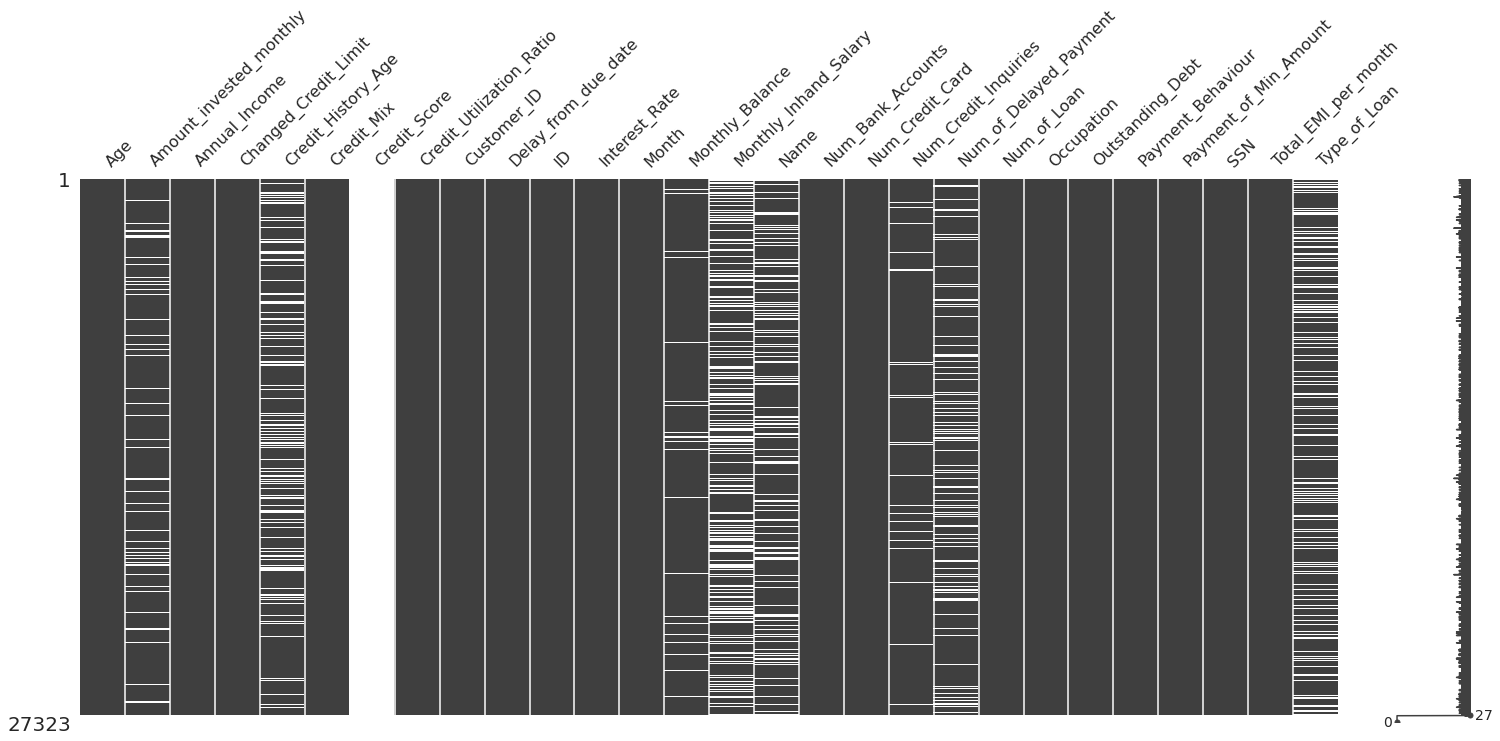

In [17]:
#Visualizing the dataset
import missingno as msno
msno.matrix(data)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27323 entries, 0 to 27322
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       26991 non-null  object 
 1   Amount_invested_monthly   24664 non-null  object 
 2   Annual_Income             26991 non-null  object 
 3   Changed_Credit_Limit      26990 non-null  object 
 4   Credit_History_Age        22333 non-null  object 
 5   Credit_Mix                26990 non-null  object 
 6   Credit_Score              0 non-null      float64
 7   Credit_Utilization_Ratio  26990 non-null  float64
 8   Customer_ID               26991 non-null  object 
 9   Delay_from_due_date       26990 non-null  float64
 10  ID                        26991 non-null  object 
 11  Interest_Rate             26990 non-null  float64
 12  Month                     26991 non-null  object 
 13  Monthly_Balance           26327 non-null  object 
 14  Monthl

# Visualizing the dataset

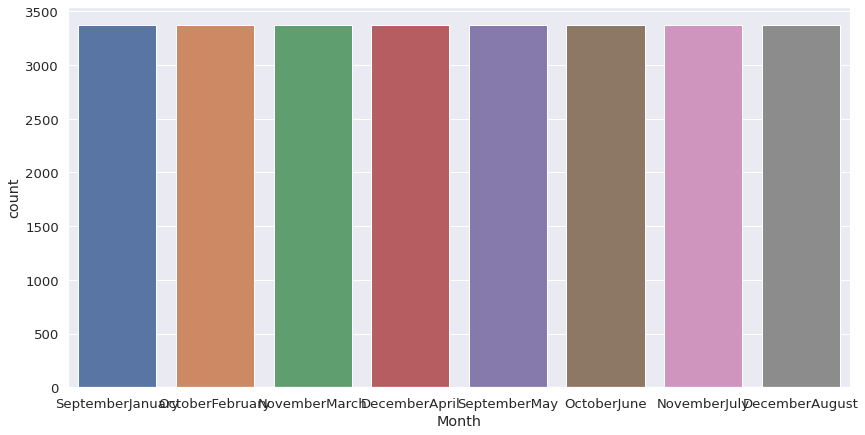

In [19]:
sns.countplot(data['Month']);

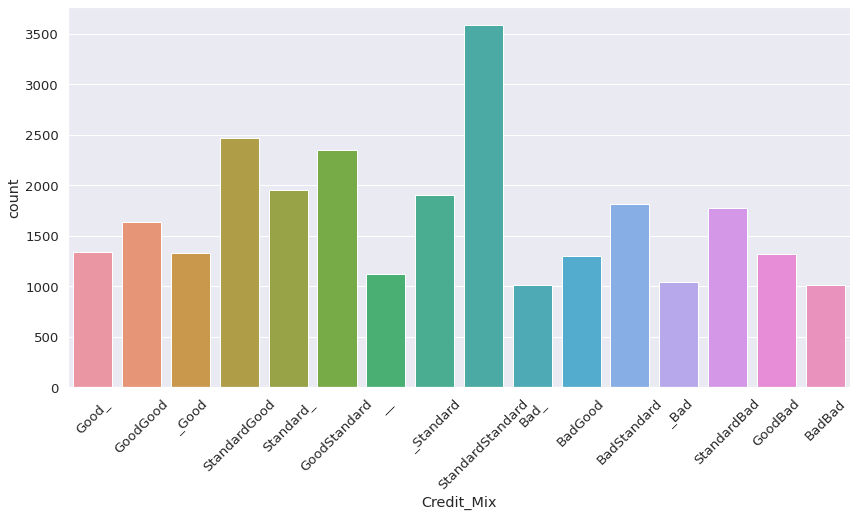

In [20]:
sns.countplot(data['Credit_Mix']);
plt.xticks(rotation=45);

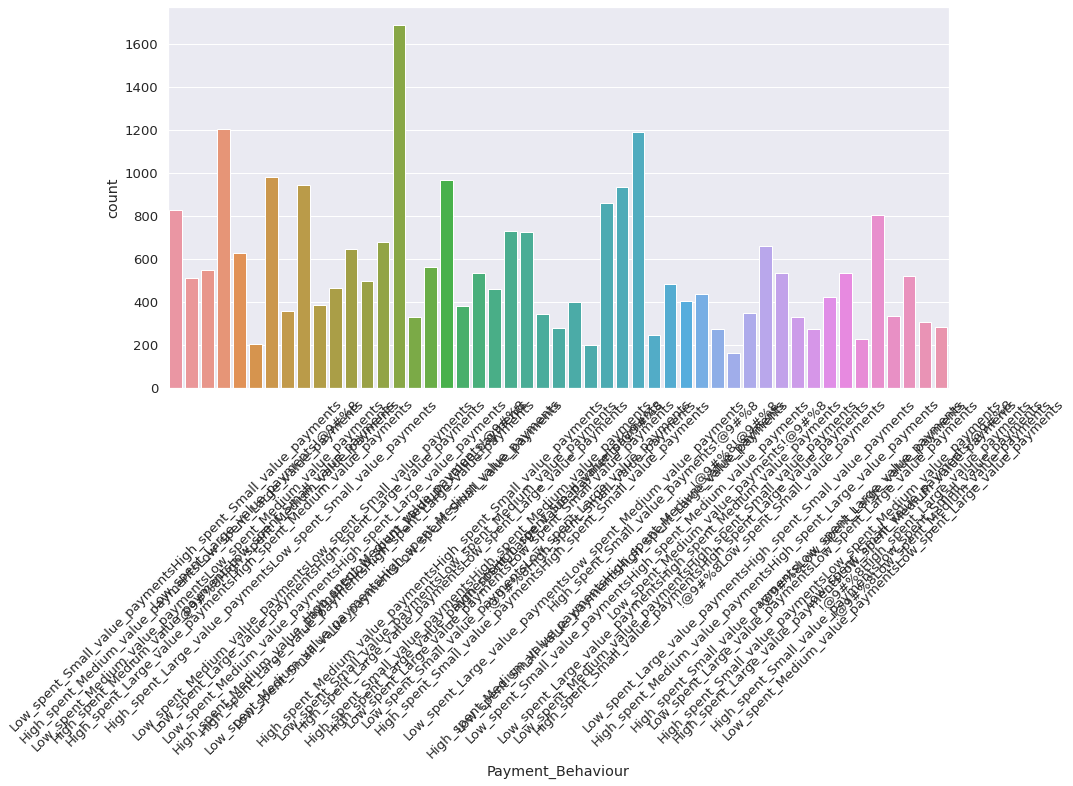

In [21]:
sns.countplot(data['Payment_Behaviour']);
plt.xticks(rotation=45);

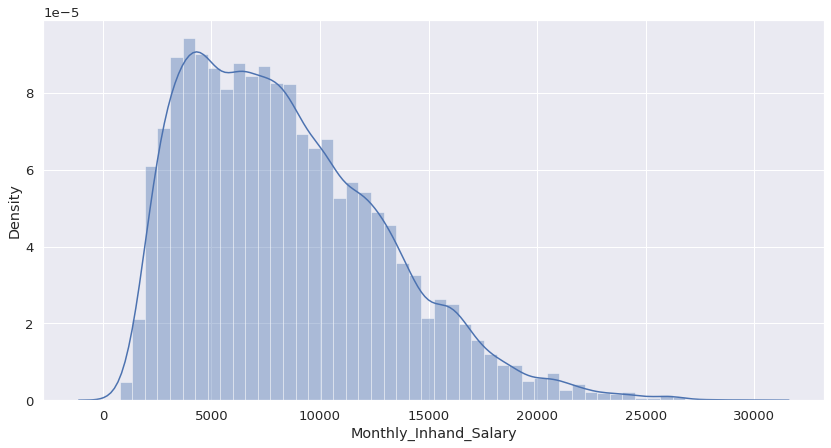

In [24]:
sns.distplot(data['Monthly_Inhand_Salary']);

In [25]:
data['Type_of_Loan'].value_counts().head(10)

Not SpecifiedPayday Loan                                                 12
Student LoanNot Specified                                                12
Mortgage Loan, and Debt Consolidation LoanDebt Consolidation Loan        12
Debt Consolidation LoanHome Equity Loan                                  12
Mortgage LoanNot Specified                                               12
Mortgage LoanPersonal Loan                                                8
Home Equity LoanMortgage Loan, Home Equity Loan, and Student Loan         8
Not SpecifiedCredit-Builder Loan, Personal Loan, and Home Equity Loan     8
Mortgage LoanNot Specified, Home Equity Loan, and Auto Loan               8
Not SpecifiedMortgage Loan                                                8
Name: Type_of_Loan, dtype: int64

# Data Cleaning

In [26]:
# deleting unique identifiers;
# they hold no info which will be usefull to the model
del data['ID'] 
del data['Name']  
del data['SSN'] 

In [27]:
# will need to convert categorical variables (which are actualy numerical in nature)
# to numerical variables

In [28]:
col_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [29]:
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

In [30]:
for col in col_to_fix :
    data[col] = data[col].apply(fix_nums)

In [31]:
# rebuilding Type of loans Columns 
for i in data['Type_of_Loan'].value_counts().head(9).index[1:] : 
    data[i] = data['Type_of_Loan'].str.contains(i)

del data['Type_of_Loan']

In [32]:
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].apply(lambda x :abs (x))

In [33]:
data['Num_Credit_Card'].replace(0,1,inplace=True)

In [34]:
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [35]:
data['Credit_History_Age'] = data['Credit_History_Age'].apply(History_age)

In [36]:
data['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [37]:
data['Payment_of_Min_Amount'].value_counts()

YesYes    7444
NoYes     5040
YesNo     5024
NoNo      3369
NMYes     1681
YesNM     1674
NMNo      1201
NoNM      1194
NMNM       363
Name: Payment_of_Min_Amount, dtype: int64

In [38]:
data['Payment_Behaviour']= data['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [39]:
data['Occupation'].value_counts()

MechanicMechanic         149
LawyerLawyer             149
ManagerTeacher           146
AccountantJournalist     144
ManagerEntrepreneur      143
                        ... 
ArchitectAccountant       69
AccountantMusician        66
EngineerJournalist        66
ManagerDoctor             59
Media_ManagerMusician     48
Name: Occupation, Length: 256, dtype: int64

In [40]:
occs = data['Occupation'].value_counts().index[1:]
occs

Index(['LawyerLawyer', 'ManagerTeacher', 'AccountantJournalist',
       'ManagerEntrepreneur', 'ScientistMechanic', 'EntrepreneurMedia_Manager',
       'EntrepreneurLawyer', 'WriterMusician', 'AccountantMedia_Manager',
       'LawyerEntrepreneur',
       ...
       'EntrepreneurAccountant', 'DoctorWriter', 'WriterDeveloper',
       'LawyerAccountant', 'DeveloperScientist', 'ArchitectAccountant',
       'AccountantMusician', 'EngineerJournalist', 'ManagerDoctor',
       'Media_ManagerMusician'],
      dtype='object', length=255)

In [42]:
id_ = "CUS_0xb891"
oc = data[data['Customer_ID'] == id_]['Occupation'].mode()
data[data['Customer_ID'] == id_].replace("_______",oc)

,Age,Amount_invested_monthly,Annual_Income,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Credit_Score,Credit_Utilization_Ratio,Customer_ID,Delay_from_due_date,...,Payment_of_Min_Amount,Total_EMI_per_month,Student LoanNot Specified,"Mortgage Loan, and Debt Consolidation LoanDebt Consolidation Loan",Debt Consolidation LoanHome Equity Loan,Mortgage LoanNot Specified,Mortgage LoanPersonal Loan,"Home Equity LoanMortgage Loan, Home Equity Loan, and Student Loan","Not SpecifiedCredit-Builder Loan, Personal Loan, and Home Equity Loan","Mortgage LoanNot Specified, Home Equity Loan, and Auto Loan"


In [43]:
for ID in data[data['Occupation'] == "_______"]['Customer_ID'] : 
    oc = data[data['Customer_ID'] == ID]['Occupation'].mode()[0]
    data[data['Customer_ID'] == ID] = data[data['Customer_ID'] == ID].replace("_______",oc)

In [44]:
data['Occupation'].value_counts()

MechanicMechanic         149
LawyerLawyer             149
ManagerTeacher           146
AccountantJournalist     144
ManagerEntrepreneur      143
                        ... 
ArchitectAccountant       69
AccountantMusician        66
EngineerJournalist        66
ManagerDoctor             59
Media_ManagerMusician     48
Name: Occupation, Length: 256, dtype: int64

In [45]:
data['Occupation'] = data['Occupation'].replace("_______",data['Occupation'].mode()[0])

In [46]:
data['Occupation'].value_counts()

MechanicMechanic         149
LawyerLawyer             149
ManagerTeacher           146
AccountantJournalist     144
ManagerEntrepreneur      143
                        ... 
ArchitectAccountant       69
AccountantMusician        66
EngineerJournalist        66
ManagerDoctor             59
Media_ManagerMusician     48
Name: Occupation, Length: 256, dtype: int64

In [47]:
data['Credit_Mix'].value_counts()

StandardStandard    3590
StandardGood        2472
GoodStandard        2353
Standard_           1952
_Standard           1900
BadStandard         1818
StandardBad         1777
GoodGood            1637
Good_               1344
_Good               1327
GoodBad             1322
BadGood             1303
__                  1124
_Bad                1047
BadBad              1015
Bad_                1009
Name: Credit_Mix, dtype: int64

In [48]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [49]:
data['Credit_Mix'] = data['Credit_Mix'].map(m)

In [50]:
# Edit Columns from bool to int 
for col in list(data.columns[-8:]):
    data[col] = data[col].astype(float)

In [51]:
IDs = 1 
for ID in data['Customer_ID'].unique() :
    data['Customer_ID'] = data['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [52]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [53]:
Numericals = data.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Amount_invested_monthly', 'Annual_Income', 'Changed_Credit_Limit',
       'Credit_History_Age', 'Credit_Mix', 'Credit_Score',
       'Credit_Utilization_Ratio', 'Customer_ID', 'Delay_from_due_date',
       'Interest_Rate', 'Monthly_Balance', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_Credit_Inquiries',
       'Num_of_Delayed_Payment', 'Num_of_Loan', 'Outstanding_Debt',
       'Total_EMI_per_month', 'Student LoanNot Specified',
       'Mortgage Loan, and Debt Consolidation LoanDebt Consolidation Loan',
       'Debt Consolidation LoanHome Equity Loan', 'Mortgage LoanNot Specified',
       'Mortgage LoanPersonal Loan',
       'Home Equity LoanMortgage Loan, Home Equity Loan, and Student Loan',
       'Not SpecifiedCredit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Mortgage LoanNot Specified, Home Equity Loan, and Auto Loan'],
      dtype='object')

In [54]:
for col in Numericals[1:]:
    imputer.fit(data[['Customer_ID',col]])
    data[['Customer_ID',col]] = imputer.transform(data[['Customer_ID',col]])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27323 entries, 0 to 27322
Data columns (total 32 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Age                                                                    26748 non-null  float64
 1   Amount_invested_monthly                                                2140 non-null   float64
 2   Annual_Income                                                          0 non-null      float64
 3   Changed_Credit_Limit                                                   1096 non-null   float64
 4   Credit_History_Age                                                     22333 non-null  float64
 5   Credit_Mix                                                             0 non-null      float64
 6   Credit_Score                                                           0 non-null     

In [56]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(data[['Payment_Behaviour']])
data[['Payment_Behaviour']] = imputer.transform(data[['Payment_Behaviour']])

In [58]:
# ## replace Outliers with median 
# for col in Numericals :
#     outliers_indecies = detect_outliers(data,0,[col])
#     median = data[col].median()
#     data[col].iloc[outliers_indecies] = median

# Data Preprocessing

In [59]:
data.select_dtypes(include="object")

,Month,Occupation,Payment_Behaviour,Payment_of_Min_Amount
0,SeptemberJanuary,ScientistScientist,Low_spent_Small_value_paymentsHigh_spent_Small...,NoNo
1,OctoberFebruary,ScientistScientist,High_spent_Medium_value_paymentsLow_spent_Larg...,NoNo
2,NovemberMarch,ScientistScientist,Low_spent_Medium_value_paymentsLow_spent_Mediu...,NoNo
3,DecemberApril,ScientistScientist,High_spent_Medium_value_paymentsLow_spent_Smal...,NoNo
4,SeptemberMay,_______Scientist,High_spent_Large_value_paymentsHigh_spent_Medi...,NoNo
...,...,...,...,...
27318,NaN,NaN,Low_spent_Small_value_paymentsLow_spent_Small_...,NaN
27319,NaN,NaN,Low_spent_Small_value_paymentsLow_spent_Small_...,NaN
27320,NaN,NaN,Low_spent_Small_value_paymentsLow_spent_Small_...,NaN
27321,NaN,NaN,Low_spent_Small_value_paymentsLow_spent_Small_...,NaN


In [60]:
data['Credit_Score'].value_counts()

Series([], Name: Credit_Score, dtype: int64)

In [61]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [62]:
data['Credit_Score'] = data['Credit_Score'].map(m)

In [63]:
del data['Customer_ID']

In [64]:
data = pd.get_dummies(data,drop_first=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27323 entries, 0 to 27322
Columns: 345 entries, Age to Payment_of_Min_Amount_YesYes
dtypes: float64(27), uint8(318)
memory usage: 15.1 MB


In [66]:
# storing the pre-processed data
data.to_csv("Preprocessed_Data.csv")

In [67]:
# defining dataset
X, y = data.drop("Credit_Score",axis=1).values , data["Credit_Score"] 

In [68]:
# balancing the dataset
y.value_counts(normalize=True)

Series([], Name: Credit_Score, dtype: float64)

In [71]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

ValueError: ignored

In [ ]:
y_data_rus.value_counts(normalize=True)

In [73]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

ValueError: ignored

In [ ]:
#Using Power transformer to avoid Data Skewness
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [ ]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=100000)
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, Y_pred)